# Extracting Embeddings with LangChain, HuggingFace, and Python

### Introduction

In this notebook I explore how to leverage the powerful combination of LangChain (https://www.langchain.com/) and HuggingFace (https://huggingface.co/) to download a local embedding model and use it to embed a research papers in PDF format from arxiv (https://arxiv.org/). This process involves extracting text from the PDF and then converting this text into a numerical representation (embedding) that captures its semantic meaning. These embeddings can then be used for various NLP tasks such as document similarity, clustering, or information retrieval. I show how to extract the local HuggingFace embeddings into a Pandas dataframe to make further study of the embeddings and their properties convenient.

### Installs

In [35]:
# ! pip install langchain # install LangChain
# ! pip install pypdf
# ! pip install sentence-transformers
# ! pip install chromadb
# ! git clone https://huggingface.co/intfloat/e5-large-v2 # download a local copy of the
                                                          #      embedding model from HuggingFace

In [15]:
! ls

e5-large-v2  rovelli2001.pdf  sample_data


### Imports

In [43]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

### Load document

In [16]:
loaders = [
    PyPDFLoader('/content/rovelli2001.pdf')
]

In [18]:
docs = []
for loader in loaders:
  docs.extend(loader.load())

### Split document in chunks

In [19]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

In [21]:
splits = text_splitter.split_documents(docs)
len(splits)

65

In [22]:
splits[0]

Document(page_content='arXiv:gr-qc/0006061v3  23 Jan 2001Notes for a brief history of quantum gravity\nPresented at the 9th Marcel Grossmann Meeting in Roma, July 2 000\nCarlo Rovelli\nCentre de Physique Th´ eorique, CNRS Luminy, 13288 Marseill e, France\nPhysics Department, University of Pittsburgh, Pittsburgh , PA 15260, USA.\nrovelli@cpt.univ-mrs.fr\nFebruary 3, 2008\nAbstract\nI sketch the main lines of development of the research in quan tum gravity,\nfrom the ﬁrst explorations in the early thirties to nowadays .\n1 Introduction\nWhen John Stachel asked me to prepare a brief history of the re search in quan-\ntum gravity for the 9th Marcel Grossmann Meeting, I trembled at the size of\nthe task, worried of repeating only information already kno wn to everybody,\nand feared to displease my colleagues. John managed to convi nce me to try\nanyway, and here is the result. I have much enjoyed spending t ime in the “old\narchives” section of my library, and I have been surprised by some 

In [23]:
splits[10]

Document(page_content='The search for a quantum theory of the gravitational field\n   Prehistory    \n1920 The gravitational field needs\nto be quantized  \n1930 «Flat space quantization»\n1950 «Phase space\nquantization»\n1957\nConstraint theory«Feynman\nquantization»\n    Classical\n   period   \n1961ADMTree-amplitudes\n1962 Background field\nmethod\n1963 Wave function of the 3-\ngeometry, spacetime foam\n1967\nWheeler-DeWitt equationGhosts                            \n1968 MinisuperspaceFeynman rules\ncompleted\n    MiddleAges    \n1971 YM renormalization\n1972 Twistors\n1973\nNonrenormalizability\n1974 Black Hole\nradiation\n1976 Asymptotic savety\n1976 Supergravity\n1977 High derivative theories\n1978\nEuclidean QG\n1981\n1983 Wave function\nof the Universe\n    Renaissance    \n1984 String renaissance\n1986 Connection\nformulation of GRTQFT\n1987\nSuperstring theory\n1988\nLoop quantum gravity2+1\n1989 2d QG\n1992 Weaves State sum models\n1994Noncommutative\ngeometry\n    Nowdays

### Embed text chunks

In [28]:
embedding = HuggingFaceEmbeddings(model_name='/content/e5-large-v2')

In [29]:
type(embedding)

langchain_community.embeddings.huggingface.HuggingFaceEmbeddings

In [30]:
print(embedding)

client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 1024, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Normalize()
) model_name='/content/e5-large-v2' cache_folder=None model_kwargs={} encode_kwargs={} multi_process=False show_progress=False


### Vector DB

In [31]:
persist_directory = 'docs/chroma'

In [36]:
vectordb = Chroma.from_documents(
    documents = splits,
    embedding = embedding,
    persist_directory = persist_directory
)

### Semantic Search

In [37]:
question = "what are the three main lines of research in quantum gravity?"

In [38]:
ans1 = vectordb.similarity_search(question, k=3)

In [39]:
len(ans1)

3

In [40]:
ans1[0]

Document(page_content='in a ﬁeld that has not yet succeeded in ﬁnding consensus, my pe rspective is\nobviously subjective. Trying to write history in the middle of the developments\nis hard. Time will go along, dust will settle, and it will slow ly become clear if\nwe are right, if some of us are right, or –a possibility never t o disregard– if we\nall are wrong.\n2 Three main directions\nAn evident peculiarity of the research in quantum gravity is that all along its\ndevelopment it can be separated into three main lines of rese arch. The relative\nweight of these lines has changed, there have been important intersections and\nconnections between the three, and there has been research t hat does not ﬁt into\nany of the three lines. Nevertheless, the three lines have ma intained a distinct\nindividuality across 70 years of research. The three main li nes are often denoted\n“covariant”, “canonical”, and “sum over histories”, even i f these names can be\nmisleading and are often confused.

### Convert embeddings to dataframe

In [41]:
response1 = vectordb.get(include=["metadatas", "documents", "embeddings"])

Note:

def get(ids: Optional[OneOrMany[ID]]=None, where: Optional[Where]=None, limit: Optional[int]=None, offset: Optional[int]=None, where_document: Optional[WhereDocument]=None, include: Optional[List[str]]=None) -> Dict[str, Any]
Gets the collection.

Args:
    ids: The ids of the embeddings to get. Optional.
    where: A Where type dict used to filter results by.
           E.g. {"color" : "red", "price": 4.20}. Optional.
    limit: The number of documents to return. Optional.
    offset: The offset to start returning results from.
            Useful for paging results with limit. Optional.
    where_document: A WhereDocument type dict used to filter by the documents.
                    E.g. {$contains: "hello"}. Optional.
    include: A list of what to include in the results.
             Can contain "embeddings", "metadatas", "documents". Ids are always included. Defaults to ["metadatas", "documents"]. Optional.

In [53]:
df = pd.DataFrame(
    {
        "id": response1["ids"],
        "source": [metadata.get("source") for metadata in response1["metadatas"]],
        "page": [metadata.get("page", -1) for metadata in response1["metadatas"]],
        "document": response1["documents"],
        "embedding": response1["embeddings"]
    }
)

In [54]:
df.head()

,id,source,page,document,embedding
0,20e79f76-c95a-11ee-811f-0242ac1c000c,/content/rovelli2001.pdf,0,arXiv:gr-qc/0006061v3 23 Jan 2001Notes for a ...,"[0.012983507476747036, -0.03757352754473686, 0..."
1,20e7a980-c95a-11ee-811f-0242ac1c000c,/content/rovelli2001.pdf,0,do not cover important related subjects such a...,"[0.007042120676487684, -0.033427298069000244, ..."
2,20e7aa3e-c95a-11ee-811f-0242ac1c000c,/content/rovelli2001.pdf,1,in a ﬁeld that has not yet succeeded in ﬁnding...,"[0.01064505148679018, -0.04473945498466492, 0...."
3,20e7aac0-c95a-11ee-811f-0242ac1c000c,/content/rovelli2001.pdf,1,"space, or some other background metric space. ...","[0.007869093678891659, -0.039869844913482666, ..."
4,20e7ab42-c95a-11ee-811f-0242ac1c000c,/content/rovelli2001.pdf,1,"the late eighties, with loop quantum gravity.\...","[0.0028657885268330574, -0.032922398298978806,..."


In [51]:
len(df['embedding'][0])

1024

In [56]:
df['page'].value_counts()[0:10]

1     3
3     3
5     3
21    3
0     2
27    2
26    2
25    2
24    2
23    2
Name: page, dtype: int64

### Extract embedding of question and associated answer

In [57]:
question_row = pd.DataFrame(
    {
        "id": "question",
        "question": question,
        "embedding": embedding.embed_query(question),
    }
)

In [62]:
ans1

[Document(page_content='in a ﬁeld that has not yet succeeded in ﬁnding consensus, my pe rspective is\nobviously subjective. Trying to write history in the middle of the developments\nis hard. Time will go along, dust will settle, and it will slow ly become clear if\nwe are right, if some of us are right, or –a possibility never t o disregard– if we\nall are wrong.\n2 Three main directions\nAn evident peculiarity of the research in quantum gravity is that all along its\ndevelopment it can be separated into three main lines of rese arch. The relative\nweight of these lines has changed, there have been important intersections and\nconnections between the three, and there has been research t hat does not ﬁt into\nany of the three lines. Nevertheless, the three lines have ma intained a distinct\nindividuality across 70 years of research. The three main li nes are often denoted\n“covariant”, “canonical”, and “sum over histories”, even i f these names can be\nmisleading and are often confused

In [66]:
print(type(ans1))
print(len(ans1))

<class 'list'>
3


In [69]:
# get ans from passing thru llm before running this block:
#answer_row = pd.DataFrame(
#    {
#        "id": "answer",
#        "answer": ans1[0],
#        "embedding": embedding.embed_query(ans1[0]),
#    }
#)

In [92]:
df_emb = []
df_emb = pd.DataFrame({'emb0': df['embedding'][0],
                       'emb1': df['embedding'][1],
                       'emb10': df['embedding'][10],
                       'emb55': df['embedding'][55],

                       })

df_emb = df_emb.reset_index()
df_emb.columns = ['embedding_index', 'chunk0_embedding', 'chunk1_embedding', 'chunk10_embedding', 'chunk55_embedding']
df_emb.head(3)

,embedding_index,chunk0_embedding,chunk1_embedding,chunk10_embedding,chunk55_embedding
0,0,0.012984,0.007042,-0.001034,0.018988
1,1,-0.037574,-0.033427,-0.032981,-0.017809
2,2,0.039866,0.028238,0.026743,0.054628


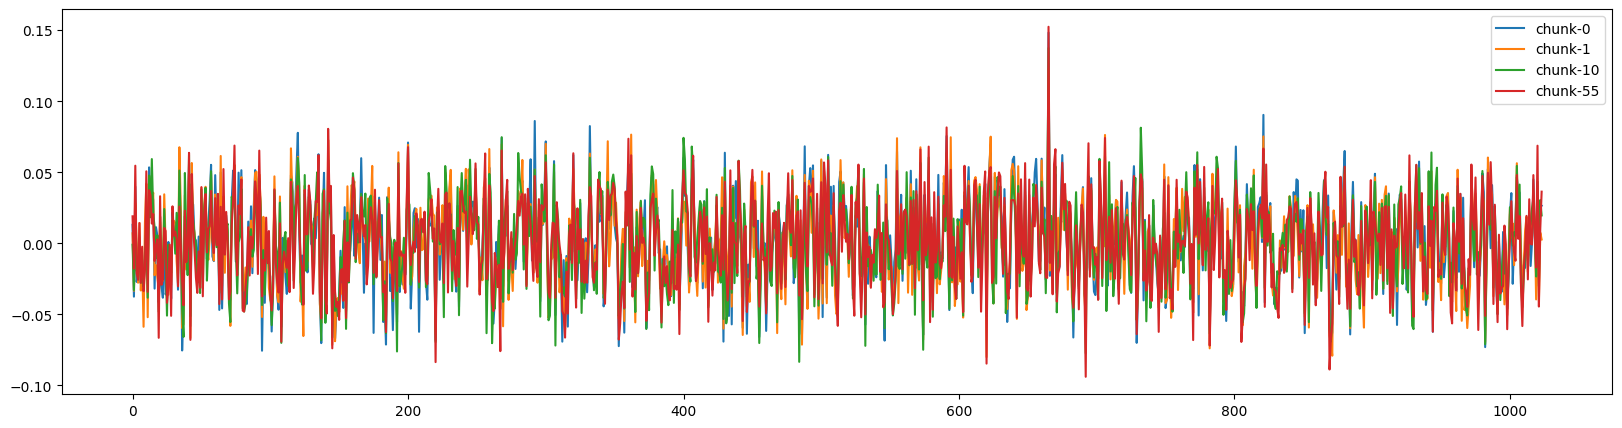

In [101]:
plt.figure(figsize=(20,5))
plt.plot(df_emb['embedding_index'], df_emb['chunk0_embedding'], label='chunk-0')
plt.plot(df_emb['embedding_index'], df_emb['chunk1_embedding'], label='chunk-1')
plt.plot(df_emb['embedding_index'], df_emb['chunk10_embedding'], label='chunk-10')
plt.plot(df_emb['embedding_index'], df_emb['chunk55_embedding'], label='chunk-55')

plt.legend()

<ipython-input-106-9d8d2f31bf41>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


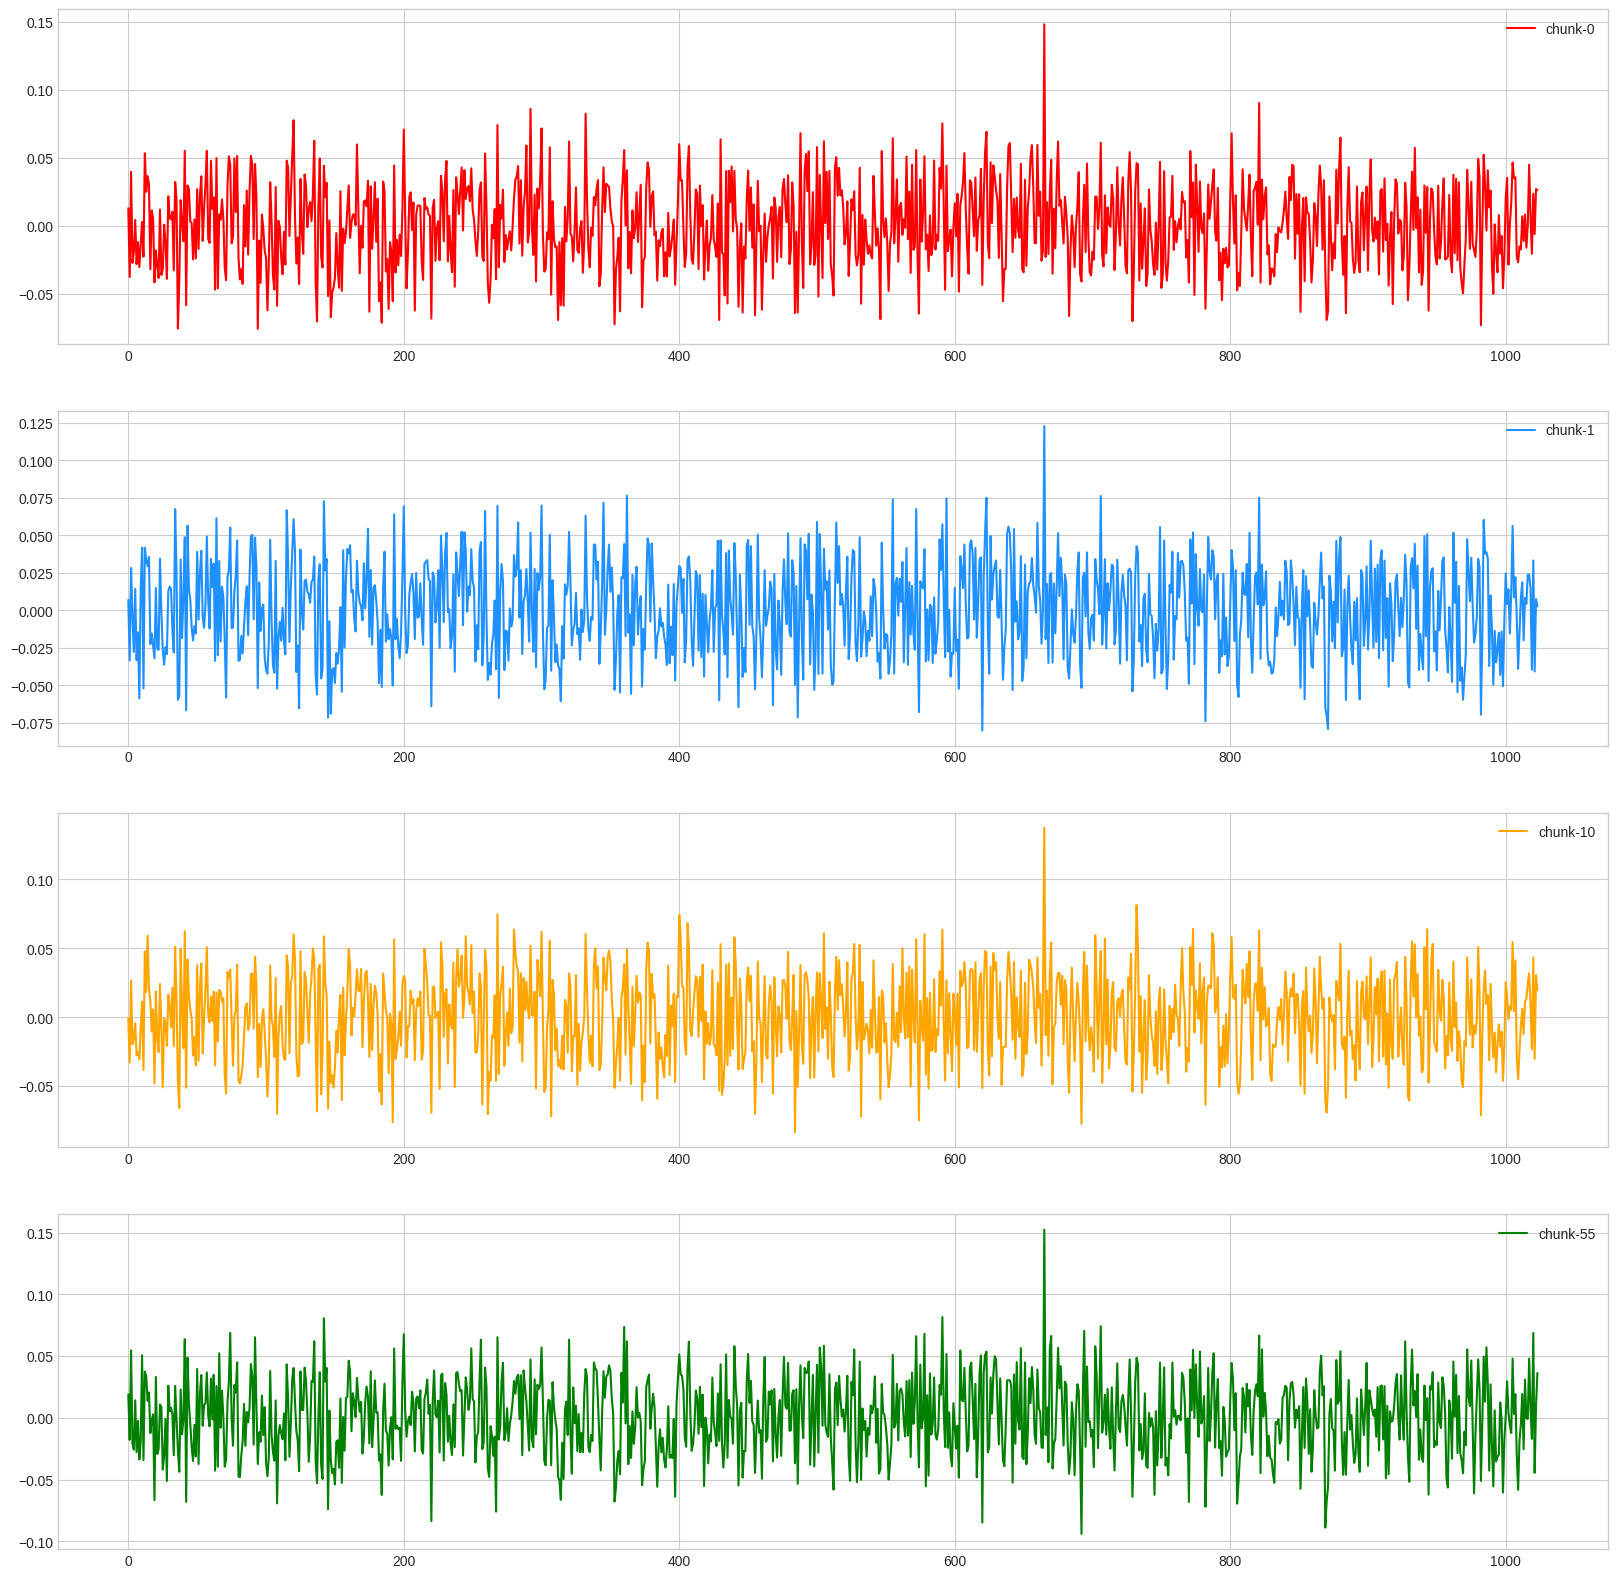

In [106]:
plt.figure(figsize=(20,20))
plt.style.use('default')
plt.style.use('seaborn-whitegrid')

plt.subplot(4,1,1)
plt.plot(df_emb['embedding_index'], df_emb['chunk0_embedding'], label='chunk-0', color='red')
plt.legend()
plt.subplot(4,1,2)
plt.plot(df_emb['embedding_index'], df_emb['chunk1_embedding'], label='chunk-1', color='dodgerblue')
plt.legend()
plt.subplot(4,1,3)
plt.plot(df_emb['embedding_index'], df_emb['chunk10_embedding'], label='chunk-10', color='orange')
plt.legend()
plt.subplot(4,1,4)
plt.legend()
plt.plot(df_emb['embedding_index'], df_emb['chunk55_embedding'], label='chunk-55', color='green')
plt.legend()

<ipython-input-112-8be9b4f0c0b0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


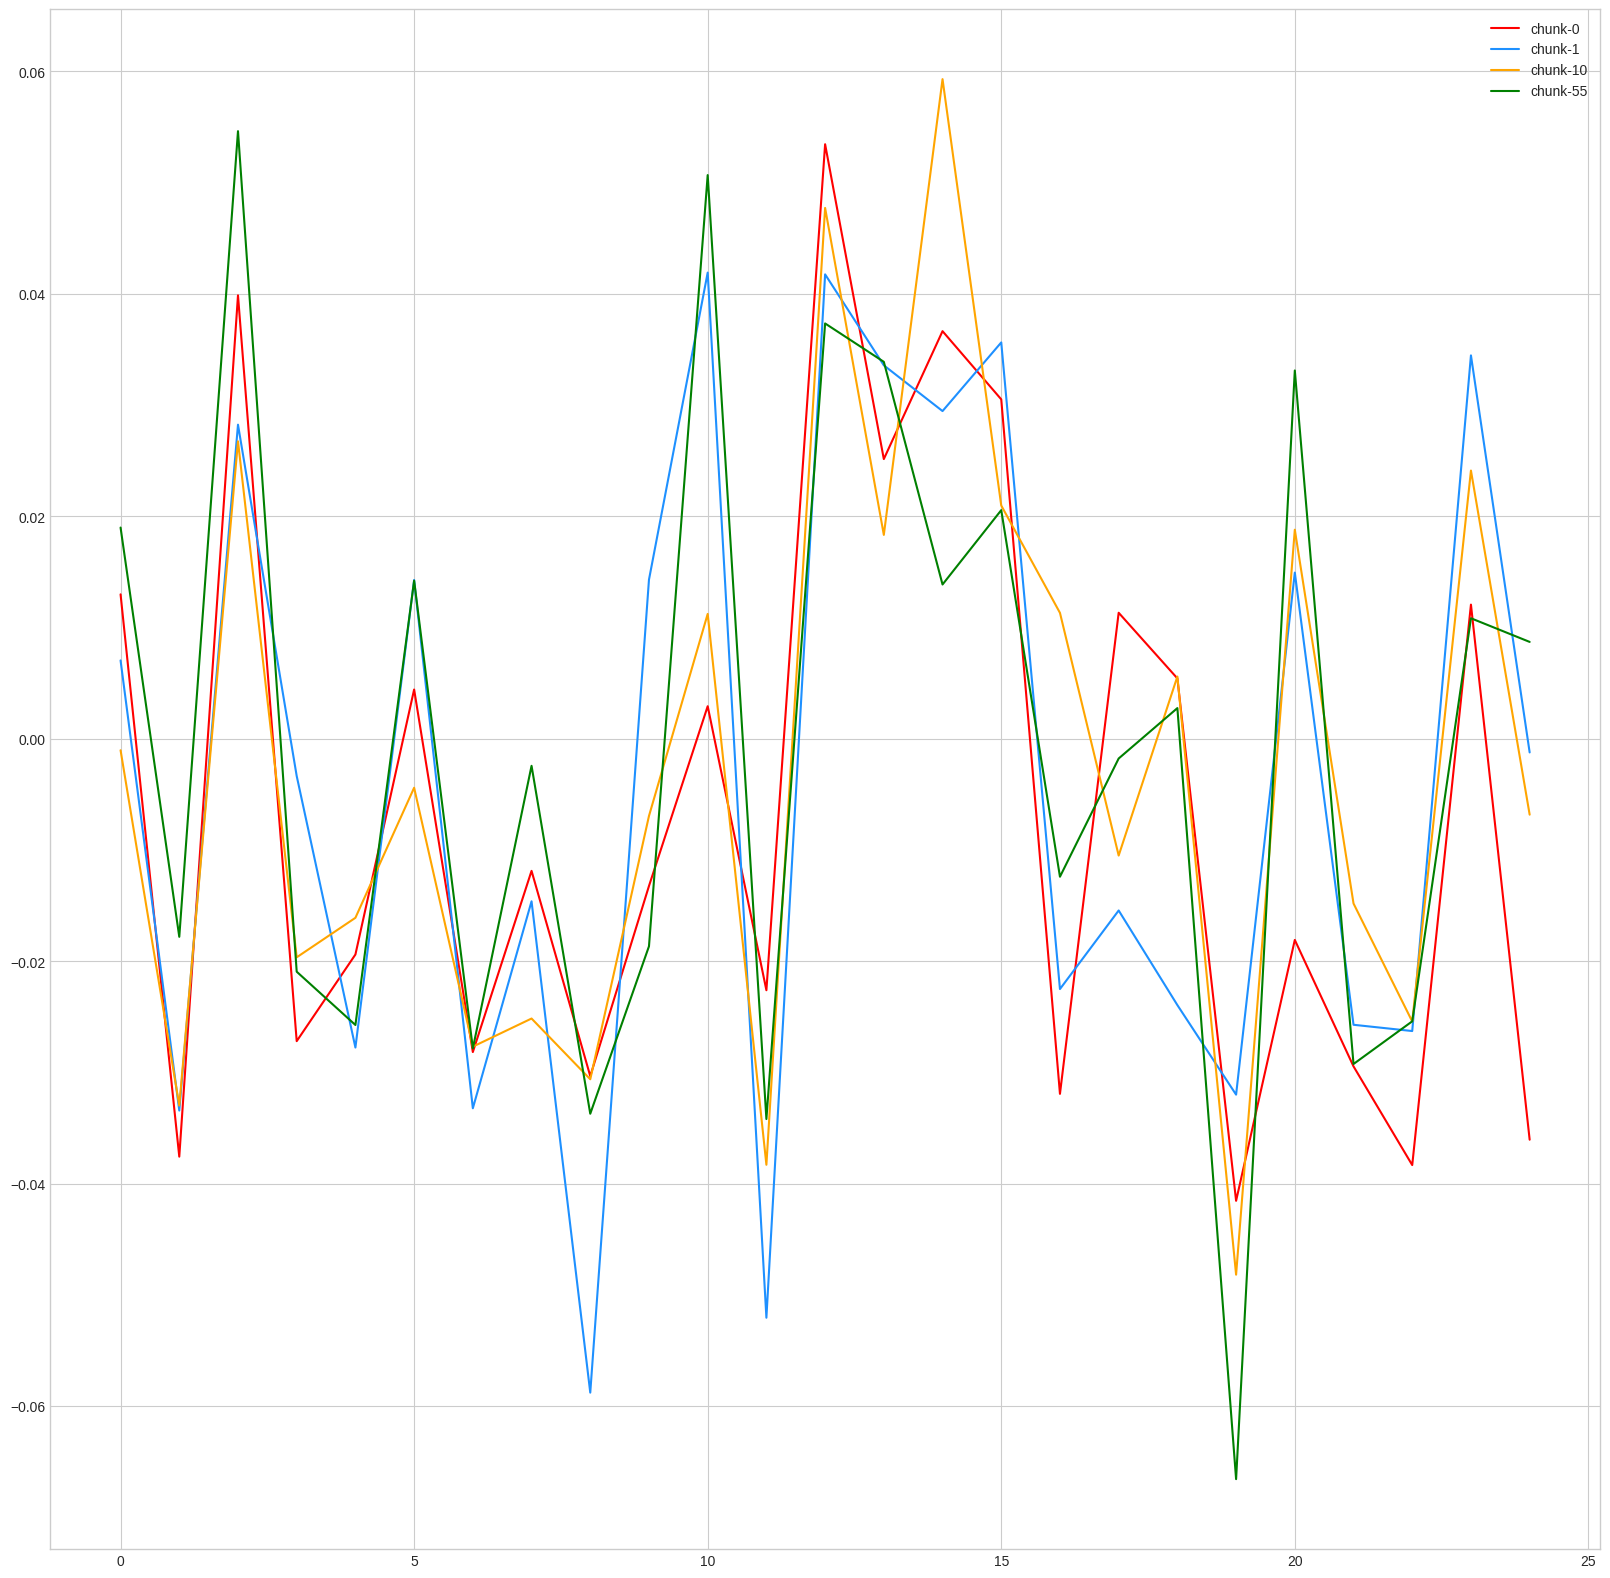

In [112]:
plt.figure(figsize=(20,20))
plt.style.use('default')
plt.style.use('seaborn-whitegrid')

#plt.subplot(4,1,1)
plt.plot(df_emb['embedding_index'].head(25), df_emb['chunk0_embedding'].head(25), label='chunk-0', color='red')
#plt.legend()

#plt.subplot(4,1,2)
plt.plot(df_emb['embedding_index'].head(25), df_emb['chunk1_embedding'].head(25), label='chunk-1', color='dodgerblue')
#plt.legend()

#plt.subplot(4,1,3)
plt.plot(df_emb['embedding_index'].head(25), df_emb['chunk10_embedding'].head(25), label='chunk-10', color='orange')
#plt.legend()

#plt.subplot(4,1,4)
plt.plot(df_emb['embedding_index'].head(25), df_emb['chunk55_embedding'].head(25), label='chunk-55', color='green')
plt.legend()

In [89]:
np.corrcoef(df_emb['chunk0_embedding'], df_emb['chunk1_embedding'])

array([[1.        , 0.86952776],
       [0.86952776, 1.        ]])

In [95]:
np.corrcoef(df_emb['chunk0_embedding'], df_emb['chunk10_embedding'])

array([[1.        , 0.85695593],
       [0.85695593, 1.        ]])

In [96]:
np.corrcoef(df_emb['chunk0_embedding'], df_emb['chunk55_embedding'])

array([[1.        , 0.84890769],
       [0.84890769, 1.        ]])

In [97]:
splits[55]

Document(page_content='[66] MF Atiyah, “Topological quantum ﬁeld theories”, Publ M ath Inst Hautes\nEtudes Sci, Paris 68, 175 (1989); The Geometry and Physics of Knots ,\nAccademia Nazionale dei Lincei, (Cambridge University Pre ss, 1990).\n[67] GT Horowitz, “Exactly soluble diﬀeomorphism invarian t theories”, Com-\nmun Math Phys 125 (1989) 417.\n[68] GT Horowitz, J Lykken, R Rohm, A Strominger, “A purely cu bic action\nfor string ﬁeld theory”, Phys Rev Lett 57 (1986) 283.\n[69] A Ashtekar, “New hamiltonian formulation for general r elativity”, Phys\nRev D36 (1987) 1587.\n[70] A Sen, “Gravity as a spin system”, Phys Lett, B119 (1982) 89.\n27', metadata={'source': '/content/rovelli2001.pdf', 'page': 26})

In [98]:
splits[10]

Document(page_content='The search for a quantum theory of the gravitational field\n   Prehistory    \n1920 The gravitational field needs\nto be quantized  \n1930 «Flat space quantization»\n1950 «Phase space\nquantization»\n1957\nConstraint theory«Feynman\nquantization»\n    Classical\n   period   \n1961ADMTree-amplitudes\n1962 Background field\nmethod\n1963 Wave function of the 3-\ngeometry, spacetime foam\n1967\nWheeler-DeWitt equationGhosts                            \n1968 MinisuperspaceFeynman rules\ncompleted\n    MiddleAges    \n1971 YM renormalization\n1972 Twistors\n1973\nNonrenormalizability\n1974 Black Hole\nradiation\n1976 Asymptotic savety\n1976 Supergravity\n1977 High derivative theories\n1978\nEuclidean QG\n1981\n1983 Wave function\nof the Universe\n    Renaissance    \n1984 String renaissance\n1986 Connection\nformulation of GRTQFT\n1987\nSuperstring theory\n1988\nLoop quantum gravity2+1\n1989 2d QG\n1992 Weaves State sum models\n1994Noncommutative\ngeometry\n    Nowdays

In [99]:
splits[0]

Document(page_content='arXiv:gr-qc/0006061v3  23 Jan 2001Notes for a brief history of quantum gravity\nPresented at the 9th Marcel Grossmann Meeting in Roma, July 2 000\nCarlo Rovelli\nCentre de Physique Th´ eorique, CNRS Luminy, 13288 Marseill e, France\nPhysics Department, University of Pittsburgh, Pittsburgh , PA 15260, USA.\nrovelli@cpt.univ-mrs.fr\nFebruary 3, 2008\nAbstract\nI sketch the main lines of development of the research in quan tum gravity,\nfrom the ﬁrst explorations in the early thirties to nowadays .\n1 Introduction\nWhen John Stachel asked me to prepare a brief history of the re search in quan-\ntum gravity for the 9th Marcel Grossmann Meeting, I trembled at the size of\nthe task, worried of repeating only information already kno wn to everybody,\nand feared to displease my colleagues. John managed to convi nce me to try\nanyway, and here is the result. I have much enjoyed spending t ime in the “old\narchives” section of my library, and I have been surprised by some 

In [100]:
splits[1]

Document(page_content='do not cover important related subjects such as quantum ﬁeld s in curved space-\ntime, applications such as cosmology related research, wor k on the structure\nof quantum constrained systems, black hole thermodynamics or extensions of\nquantum mechanics to general covariant theories. For lack o f energy, I have also\ndecided not to cover the numerical and lattice-like approac hes to the theory –\nwhich is a serious absence.\nI have no ambition of presenting complete references to all t he important\nworks; some of the references are to original works, others t o reviews where\nreference can be found. Errors and omissions are unfortunat ely unavoidable\nand I apologize for these. I have made my better eﬀort to be bal anced, but\n1', metadata={'source': '/content/rovelli2001.pdf', 'page': 0})

### Conclusion

In this notebook I have demonstrated how to leverage LangChain and HuggingFace to embed a research papera from arxiv. Starting with the extraction of text from the pdf, I proceeded to download a pre-trained embedding model from HuggingFace's repository. Using LangChain, I transformed the extracted text into a dense vector representation, capturing the semantic essence of the document. This process demonstrates the power of modern NLP tools in handling complex tasks such as embedding scientific documents. The generated embeddings can serve as a foundation for numerous applications, including semantic search, document clustering, similarity analysis, and even as inputs for further machine learning models tailored to specific research needs.